In [1]:
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv("data/Medicaldataset.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [31]:
df["Result"] = df["Result"].map({"positive": 1, "negative": 0})

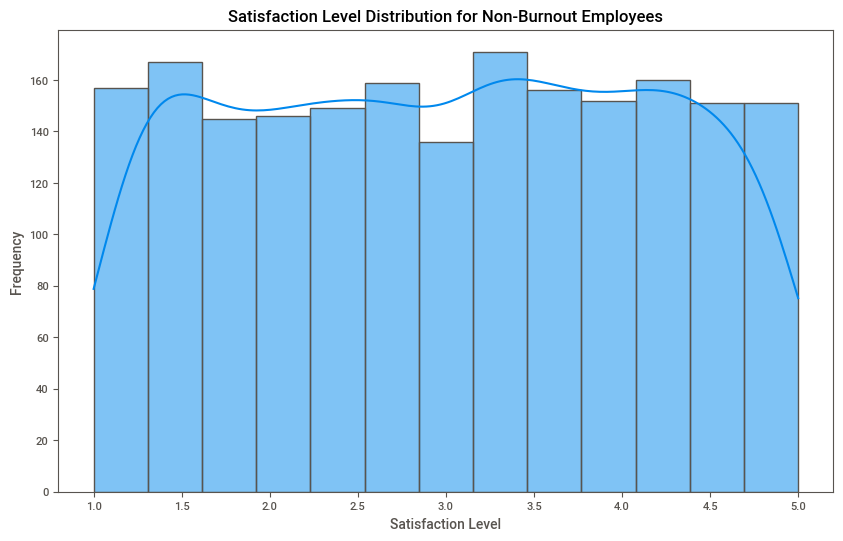

In [22]:
# Plot
sns.histplot(data=df, x="SatisfactionLevel", kde=True)
plt.title("Satisfaction Level Distribution for Non-Burnout Employees")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()


In [33]:
report = sv.analyze(df, target_feat="Result")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Statistical Tests

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams["figure.figsize"] = (10, 6)

### Question 1: Is satisfaction different for burnout vs. non-burnout?

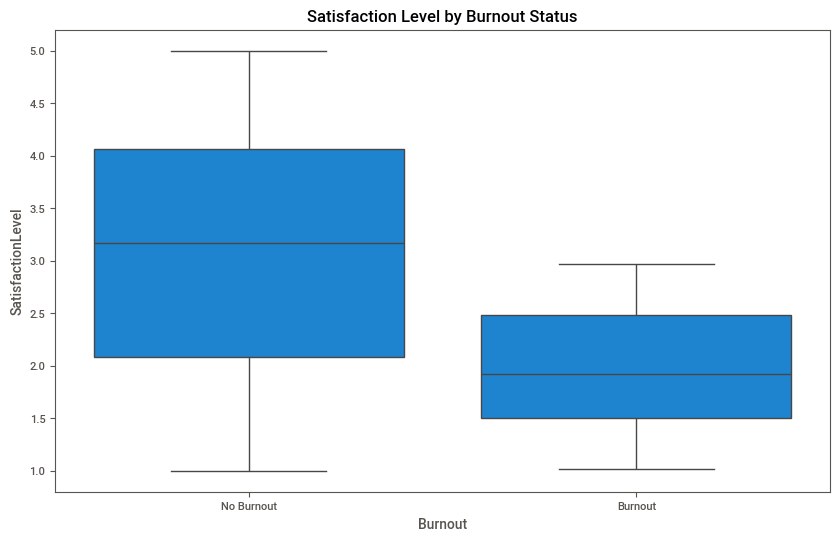

t-test: t = -19.161, p = 7.915e-48


In [19]:
# Plot
sns.boxplot(data=df, x="Burnout", y="SatisfactionLevel")
plt.title("Satisfaction Level by Burnout Status")
plt.xticks([0, 1], ["No Burnout", "Burnout"])
plt.show()

# Two-sample t-test
burnout_satisf = df[df["Burnout"] == 1]["SatisfactionLevel"]
no_burnout_satisf = df[df["Burnout"] == 0]["SatisfactionLevel"]

t_stat1, p_val1 = stats.ttest_ind(burnout_satisf, no_burnout_satisf, equal_var=False)
print("t-test: t = {:.3f}, p = {:.3e}".format(t_stat1, p_val1))

We decline H0

### Question 2: Is burnout rate different between genders?

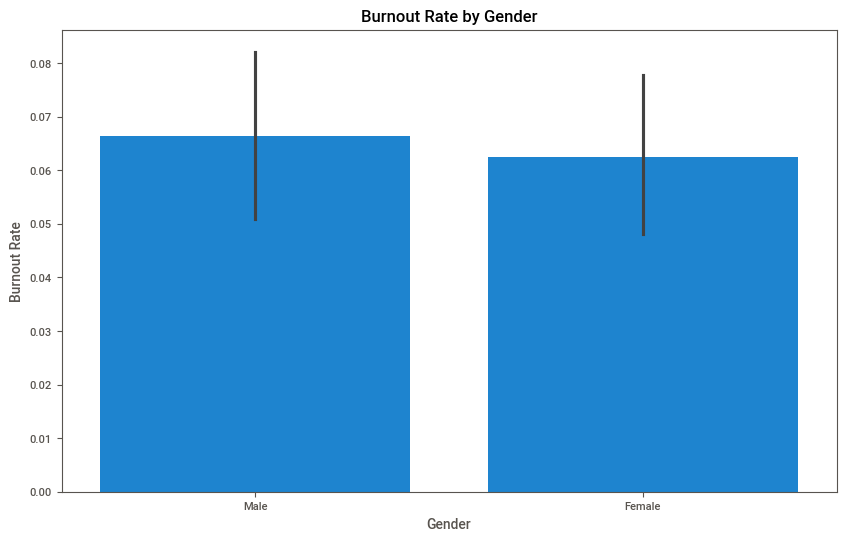

Q2 - z-test: z = 0.367, p = 0.713


In [ ]:
# Plot
sns.barplot(data=df, x="Gender", y="Burnout", estimator=np.mean)
plt.title("Burnout Rate by Gender")
plt.ylabel("Burnout Rate")
plt.show()

# Z-test for proportions
male_burnout = df[df["Gender"] == "Male"]["Burnout"]
female_burnout = df[df["Gender"] == "Female"]["Burnout"]

p1 = male_burnout.mean()
p2 = female_burnout.mean()
n1 = len(male_burnout)
n2 = len(female_burnout)

p_pool = (male_burnout.sum() + female_burnout.sum()) / (n1 + n2)
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
z_stat = (p1 - p2) / se
p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("Q2 - z-test: z = {:.3f}, p = {:.3f}".format(z_stat, p_val))

Accept H0

### Question 3: Is burnout more likely in high-stress employees (stress ≥ 7)?

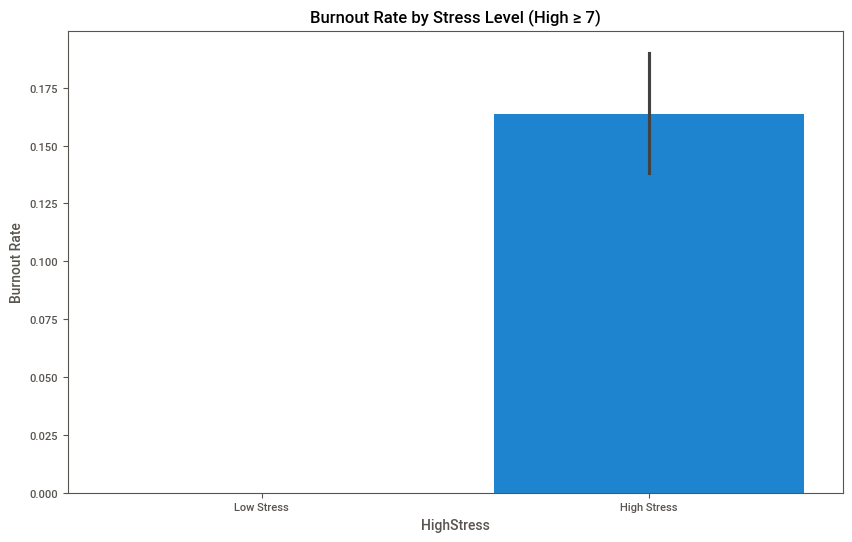

Q3 - UMP-style z-test: z = 14.548, p (one-sided) = 0.000e+00


In [16]:
# Create binary high stress indicator
df["HighStress"] = df["StressLevel"] >= 7

# Plot
sns.barplot(data=df, x="HighStress", y="Burnout", estimator=np.mean)
plt.title("Burnout Rate by Stress Level (High ≥ 7)")
plt.xticks([0, 1], ["Low Stress", "High Stress"])
plt.ylabel("Burnout Rate")
plt.show()

# Z-test for proportions (UMP test-style, one-sided)
burnout_high = df[df["HighStress"] == True]["Burnout"]
burnout_low = df[df["HighStress"] == False]["Burnout"]

ph = burnout_high.mean()
pl = burnout_low.mean()
nh = len(burnout_high)
nl = len(burnout_low)

p_pool3 = (burnout_high.sum() + burnout_low.sum()) / (nh + nl)
se3 = np.sqrt(p_pool3 * (1 - p_pool3) * (1/nh + 1/nl))
z_stat3 = (ph - pl) / se3
p_val3 = 1 - stats.norm.cdf(z_stat3)  # one-sided

print("Q3 - UMP-style z-test: z = {:.3f}, p (one-sided) = {:.3e}".format(z_stat3, p_val3))

Decline H0

### Question 4: Correlation between work hours and stress/burnout

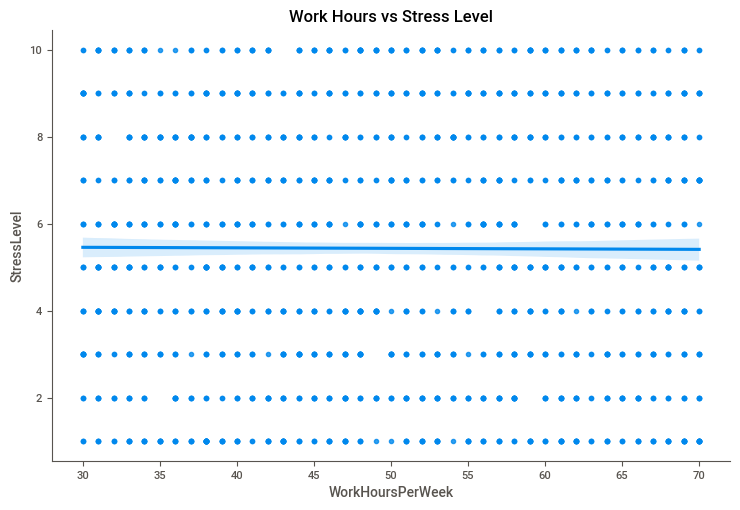

Q4 - Corr(WorkHours, Stress): r = -0.005, p = 0.829
Q4 - Corr(WorkHours, Burnout): r = 0.226, p = 1.438e-24


In [17]:
# Work Hours vs Stress
sns.lmplot(data=df, x="WorkHoursPerWeek", y="StressLevel", aspect=1.5)
plt.title("Work Hours vs Stress Level")
plt.show()

# Correlations
corr1, p_corr1 = stats.pearsonr(df["WorkHoursPerWeek"], df["StressLevel"])
corr2, p_corr2 = stats.pearsonr(df["WorkHoursPerWeek"], df["Burnout"])

print("Q4 - Corr(WorkHours, Stress): r = {:.3f}, p = {:.3f}".format(corr1, p_corr1))
print("Q4 - Corr(WorkHours, Burnout): r = {:.3f}, p = {:.3e}".format(corr2, p_corr2))

### Question 5: Is satisfaction lower in high-stress employees?

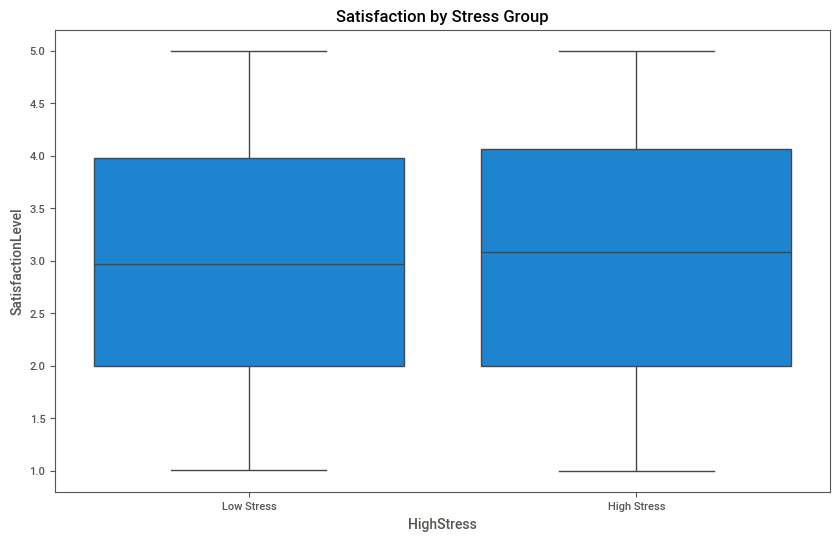

Q5 - t-test: t = 1.042, p = 0.298


In [18]:
# Plot
sns.boxplot(data=df, x="HighStress", y="SatisfactionLevel")
plt.title("Satisfaction by Stress Group")
plt.xticks([0, 1], ["Low Stress", "High Stress"])
plt.show()

# t-test
satisf_high = df[df["HighStress"] == True]["SatisfactionLevel"]
satisf_low = df[df["HighStress"] == False]["SatisfactionLevel"]
t_stat5, p_val5 = stats.ttest_ind(satisf_high, satisf_low, equal_var=False)

print("Q5 - t-test: t = {:.3f}, p = {:.3f}".format(t_stat5, p_val5))

Accept H0